In [1]:
import os
os.chdir('../../')

import DeepPurpose.DTI as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *
import Processing.dataset_filter as processors

if not os.path.exists('./result/DeepDTA'):
    os.makedirs('./result/DeepDTA')

In [2]:
df = pd.read_csv('./data/r1/title_r1_10k.csv', sep = ',', error_bad_lines=False)
X_drug, X_target, y = df['Drug'].values, df['Target'].values, df['Label'].values

drug_encoding = 'CNN'
target_encoding = 'CNN'
train, val, test = data_process(X_drug, X_target, y,
                                drug_encoding, target_encoding,
                                split_method='random',frac=[0.7,0.1,0.2])

# use the parameters setting provided in the paper: https://arxiv.org/abs/1801.10193
config = generate_config(drug_encoding = drug_encoding,
                         target_encoding = target_encoding,
                         cls_hidden_dims = [1024,1024,512],
                         train_epoch = 100,
                         LR = 0.001,
                         batch_size = 256,
                         cnn_drug_filters = [32,64,96],
                         cnn_target_filters = [32,64,96],
                         cnn_drug_kernels = [4,6,8],
                         cnn_target_kernels = [4,8,12]
                         )


Drug Target Interaction Prediction Mode...
in total: 10000 drug-target pairs
encoding drug...
unique drugs: 9516
encoding protein...
unique target sequence: 1431
splitting dataset...
Done.


Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 48.7862. Total time 0.00055 hours
Validation at Epoch 1 with loss:4.37437, MSE: 3.94483 , Pearson Correlation: 0.09934 with p-value: 1.66E-03 , Concordance Index: 0.52412
Training at Epoch 2 iteration 0 with loss 3.88840. Total time 0.02361 hours
Validation at Epoch 2 with loss:2.53994, MSE: 2.25594 , Pearson Correlation: 0.14227 with p-value: 6.29E-06 , Concordance Index: 0.53796
Training at Epoch 3 iteration 0 with loss 2.69493. Total time 0.06305 hours
Validation at Epoch 3 with loss:1.89062, MSE: 2.02668 , Pearson Correlation: 0.19007 with p-value: 1.37E-09 , Concordance Index: 0.55524
Training at Epoch 4 iteration 0 with loss 2.16465. Total time 0.11333 hours
Validation at Epoch 4 with loss:2.00597, MSE: 2.02121 , Pearson Correlation: 0.23054 with p-value: 1.57E-13 , Concordance Index: 0.56948
Training at Epoch 5 iteration 0 with loss 1.97804. Total time 0.16388 hours
Valida

Training at Epoch 39 iteration 0 with loss 1.09366. Total time 1.78638 hours
Validation at Epoch 39 with loss:2.01019, MSE: 1.94978 , Pearson Correlation: 0.44530 with p-value: 7.17E-50 , Concordance Index: 0.64352
Training at Epoch 40 iteration 0 with loss 0.49283. Total time 1.83361 hours
Validation at Epoch 40 with loss:2.54188, MSE: 2.41815 , Pearson Correlation: 0.44110 with p-value: 7.27E-49 , Concordance Index: 0.64415
Training at Epoch 41 iteration 0 with loss 0.92672. Total time 1.88138 hours
Validation at Epoch 41 with loss:1.89290, MSE: 1.91932 , Pearson Correlation: 0.43755 with p-value: 5.06E-48 , Concordance Index: 0.64051
Training at Epoch 42 iteration 0 with loss 0.42679. Total time 1.92583 hours
Validation at Epoch 42 with loss:2.54081, MSE: 2.42190 , Pearson Correlation: 0.43727 with p-value: 5.87E-48 , Concordance Index: 0.64086
Training at Epoch 43 iteration 0 with loss 0.84612. Total time 1.97555 hours
Validation at Epoch 43 with loss:1.78456, MSE: 1.99516 , Pearso

Validation at Epoch 77 with loss:2.60989, MSE: 2.15982 , Pearson Correlation: 0.41886 with p-value: 9.36E-44 , Concordance Index: 0.63630
Training at Epoch 78 iteration 0 with loss 0.14368. Total time 3.49194 hours
Validation at Epoch 78 with loss:1.75683, MSE: 2.09954 , Pearson Correlation: 0.41866 with p-value: 1.04E-43 , Concordance Index: 0.63779
Training at Epoch 79 iteration 0 with loss 0.17655. Total time 3.53 hours
Validation at Epoch 79 with loss:2.12441, MSE: 2.11498 , Pearson Correlation: 0.42017 with p-value: 4.79E-44 , Concordance Index: 0.63638
Training at Epoch 80 iteration 0 with loss 0.12290. Total time 3.56805 hours
Validation at Epoch 80 with loss:2.31113, MSE: 2.25562 , Pearson Correlation: 0.40947 with p-value: 1.04E-41 , Concordance Index: 0.63284
Training at Epoch 81 iteration 0 with loss 0.31461. Total time 3.60361 hours
Validation at Epoch 81 with loss:2.10032, MSE: 2.10117 , Pearson Correlation: 0.41512 with p-value: 6.22E-43 , Concordance Index: 0.63376
Train

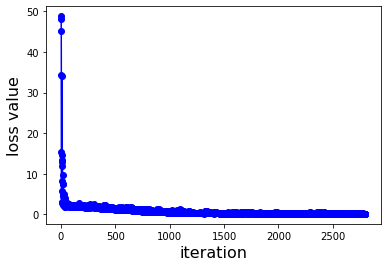

In [3]:
model = models.model_initialize(**config)
model.train(train, val, test)

In [4]:
model.save_model('./result/DeepDTA/r1/model_r1_10k_100epochs')